In [1]:
from ripple_heterogeneity.utils import functions, loading
import numpy as np 
import matplotlib.pyplot as plt
import nelpy as nel

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [2]:
basepath = r'Z:\Data\GrosmarkAD\Achilles\Achilles_10252013'
st,cell_metrics = loading.load_spikes(basepath,brainRegion='CA1',putativeCellType='Pyramidal')

ripples = loading.load_ripples_events(basepath)
ripple_epochs = nel.EpochArray(np.array([ripples.start,ripples.stop]).T)

epoch_df = loading.load_epoch(basepath)
epoch_df_epochs = nel.EpochArray(np.array([epoch_df.startTime,epoch_df.stopTime]).T)


In [3]:
autocorrs = functions.compute_AutoCorrs(st[epoch_df_epochs[1]].data)

burst_idx = functions.BurstIndex_Royer_2012(autocorrs)

In [4]:
avg_fr = st.n_spikes / (st.last_event - st.first_event)

(0.3, 1.1)

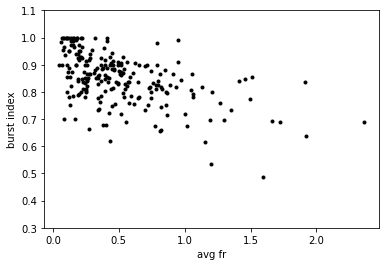

In [5]:
plt.plot(avg_fr,burst_idx,'.k')
plt.xlabel('avg fr')
plt.ylabel('burst index')

plt.ylim(0.3,1.1)

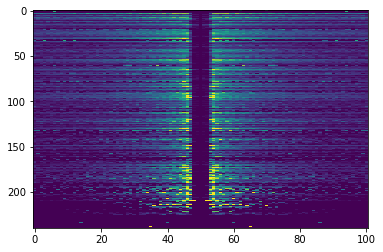

In [6]:
plt.imshow(autocorrs[np.argsort(burst_idx)].T,aspect='auto',interpolation='nearest',vmax=70)
